In [16]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func



%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = []
june_temps = session.query(Measurement).\
    filter(func.extract('month', Measurement.date) == 6)
print(june_temps)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [6]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
print(june_temps_list)

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0, 78.0, 78.0, 78.0, 77.0, 78.0, 78.0, 77.0, 77.0, 82.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 78.0, 78.0, 78.0, 78.0, 77.0, 78.0, 73.0, 70.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 77.0, 78.0, 78.0, 77.0, 78.0, 78.0, 75.0, 76.0, 76.0, 77.0, 78.0, 76.0, 77.0, 75.0, 77.0, 76.0, 76.0, 75.0, 77.0, 77.0, 76.0, 78.0, 77.0, 76.0, 77.0, 76.0, 76.0, 77.0, 77.0, 78.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 76.0, 77.0, 76.0, 73.0, 73.0, 75.0, 77.0, 76.0, 77.0, 79.0, 78.0, 79.0, 78.0, 78.0, 79.0, 77.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 76.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 76.0, 77.0, 75.0, 76.0, 74.0, 75.0, 77.0, 76.0, 77.0, 78.0, 79.0, 77.0, 78.0, 79.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 82.0, 80.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 75.0, 75.0, 76.0, 84.0, 79.0, 76.0, 79.0, 79.0, 77.0, 79.0, 78.0, 78.0, 79.0, 77.0, 79.0, 78.0, 78.0, 78.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 77.0, 78.0, 78.0, 78.0, 79.

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

june_temps_df = pd.DataFrame(june_temps_list, columns=['temps'])

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


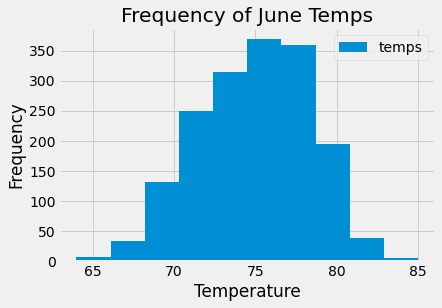

In [18]:
june_temps_df.plot.hist()
plt.title("Frequency of June Temps")
plt.xlabel("Temperature")
plt.legend
plt.savefig("Resources/June_Temp_Frequency.png")

## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = []
dec_temps = session.query(Measurement).\
    filter(func.extract('month', Measurement.date) == 12)
print(dec_temps)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [20]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]
print(dec_temps_list)

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0, 68.0, 71.0, 74.0, 67.0, 66.0, 69.0, 71.0, 70.0, 70.0, 74.0, 74.0, 71.0, 75.0, 75.0, 72.0, 69.0, 68.0, 73.0, 74.0, 73.0, 73.0, 73.0, 73.0, 71.0, 73.0, 73.0, 77.0, 72.0, 71.0, 73.0, 70.0, 73.0, 69.0, 74.0, 72.0, 71.0, 72.0, 72.0, 70.0, 73.0, 73.0, 72.0, 73.0, 73.0, 72.0, 63.0, 65.0, 71.0, 76.0, 70.0, 76.0, 69.0, 69.0, 69.0, 74.0, 76.0, 74.0, 73.0, 73.0, 74.0, 73.0, 73.0, 73.0, 74.0, 74.0, 71.0, 73.0, 72.0, 64.0, 66.0, 73.0, 72.0, 65.0, 64.0, 69.0, 68.0, 77.0, 71.0, 71.0, 69.0, 68.0, 68.0, 69.0, 70.0, 72.0, 76.0, 75.0, 69.0, 71.0, 71.0, 71.0, 68.0, 65.0, 70.0, 69.0, 69.0, 71.0, 67.0, 73.0, 74.0, 73.0, 67.0, 74.0, 75.0, 75.0, 74.0, 67.0, 73.0, 73.0, 71.0, 72.0, 71.0, 68.0, 65.0, 69.0, 70.0, 70.0, 74.0, 71.0, 74.0, 73.0, 72.0, 74.0, 72.0, 74.0, 75.0, 74.0, 70.0, 74.0, 70.0, 66.0, 61.0, 63.0, 63.0, 63.0, 63.0, 67.0, 56.0, 75.0, 77.0, 75.0, 75.0, 75.0, 75.0, 71.0, 70.0, 74.0, 74.0, 75.0, 72.0, 70.0, 66.0, 74.0, 75.0, 74.0, 75.0, 76.

In [21]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns=['temps'])

In [22]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


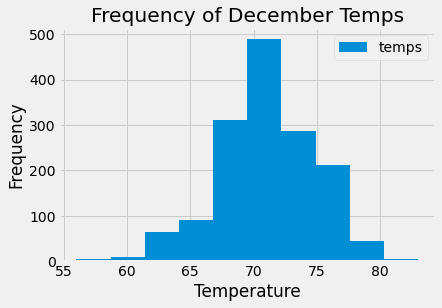

In [24]:
dec_temps_df.plot.hist()
plt.title("Frequency of December Temps")
plt.xlabel("Temperature")
plt.legend
plt.savefig("Resources/Dec_Temp_Frequency.png")